# Feature scaling and Learning Rate (Multi-variable)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_multi import load_house_data, run_gradient_descent
from lab_utils_multi import norm_plot,plt_equal_scale,plot_cost_i_w
from lab_utils_common import dlc
np.set_printoptions(precision=2)
plt.style.use("deeplearning.mplstyle")

In [3]:
X_train,y_train=load_house_data()
X_features=["size(sqft)","bredooms","floors","age"]

In [4]:
X_train
y_train

array([[1.24e+03, 3.00e+00, 1.00e+00, 6.40e+01],
       [1.95e+03, 3.00e+00, 2.00e+00, 1.70e+01],
       [1.72e+03, 3.00e+00, 2.00e+00, 4.20e+01],
       [1.96e+03, 3.00e+00, 2.00e+00, 1.50e+01],
       [1.31e+03, 2.00e+00, 1.00e+00, 1.40e+01],
       [8.64e+02, 2.00e+00, 1.00e+00, 6.60e+01],
       [1.84e+03, 3.00e+00, 1.00e+00, 1.70e+01],
       [1.03e+03, 3.00e+00, 1.00e+00, 4.30e+01],
       [3.19e+03, 4.00e+00, 2.00e+00, 8.70e+01],
       [7.88e+02, 2.00e+00, 1.00e+00, 8.00e+01],
       [1.20e+03, 2.00e+00, 2.00e+00, 1.70e+01],
       [1.56e+03, 2.00e+00, 1.00e+00, 1.80e+01],
       [1.43e+03, 3.00e+00, 1.00e+00, 2.00e+01],
       [1.22e+03, 2.00e+00, 1.00e+00, 1.50e+01],
       [1.09e+03, 2.00e+00, 1.00e+00, 6.40e+01],
       [8.48e+02, 1.00e+00, 1.00e+00, 1.70e+01],
       [1.68e+03, 3.00e+00, 2.00e+00, 2.30e+01],
       [1.77e+03, 3.00e+00, 2.00e+00, 1.80e+01],
       [1.04e+03, 3.00e+00, 1.00e+00, 4.40e+01],
       [1.65e+03, 2.00e+00, 1.00e+00, 2.10e+01],
       [1.09e+03, 2.

array([300.  , 509.8 , 394.  , 540.  , 415.  , 230.  , 560.  , 294.  ,
       718.2 , 200.  , 302.  , 468.  , 374.2 , 388.  , 282.  , 311.8 ,
       401.  , 449.8 , 301.  , 502.  , 340.  , 400.28, 572.  , 264.  ,
       304.  , 298.  , 219.8 , 490.7 , 216.96, 368.2 , 280.  , 526.87,
       237.  , 562.43, 369.8 , 460.  , 374.  , 390.  , 158.  , 426.  ,
       390.  , 277.77, 216.96, 425.8 , 504.  , 329.  , 464.  , 220.  ,
       358.  , 478.  , 334.  , 426.98, 290.  , 463.  , 390.8 , 354.  ,
       350.  , 460.  , 237.  , 288.3 , 282.  , 249.  , 304.  , 332.  ,
       351.8 , 310.  , 216.96, 666.34, 330.  , 480.  , 330.3 , 348.  ,
       304.  , 384.  , 316.  , 430.4 , 450.  , 284.  , 275.  , 414.  ,
       258.  , 378.  , 350.  , 412.  , 373.  , 225.  , 390.  , 267.4 ,
       464.  , 174.  , 340.  , 430.  , 440.  , 216.  , 329.  , 388.  ,
       390.  , 356.  , 257.8 ])

Text(0.5, 0, 'size(sqft)')

Text(0.5, 0, 'bredooms')

Text(0.5, 0, 'floors')

Text(0.5, 0, 'age')

Text(0, 0.5, "Price (1000's)")

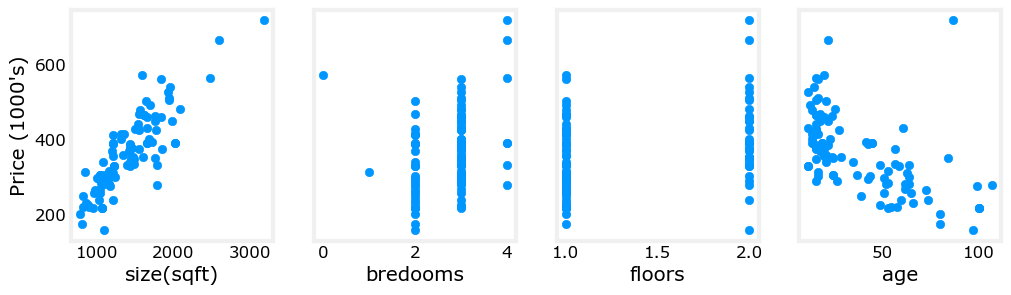

In [5]:
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

In [6]:
# alpha is 9.9e-7
_,_,hist=run_gradient_descent(X_train,y_train,10,alpha=9.9e-7)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 9.55884e+04  5.5e-01  1.0e-03  5.1e-04  1.2e-02  3.6e-04 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 1.28213e+05 -8.8e-02 -1.7e-04 -1.0e-04 -3.4e-03 -4.8e-05  6.4e+05  1.2e+03  6.2e+02  1.6e+04  4.1e+02
        2 1.72159e+05  6.5e-01  1.2e-03  5.9e-04  1.3e-02  4.3e-04 -7.4e+05 -1.4e+03 -7.0e+02 -1.7e+04 -4.9e+02
        3 2.31358e+05 -2.1e-01 -4.0e-04 -2.3e-04 -7.5e-03 -1.2e-04  8.6e+05  1.6e+03  8.3e+02  2.1e+04  5.6e+02
        4 3.11100e+05  7.9e-01  1.4e-03  7.1e-04  1.5e-02  5.3e-04 -1.0e+06 -1.8e+03 -9.5e+02 -2.3e+04 -6.6e+02
        5 4.18517e+05 -3.7e-01 -7.1e-04 -4.0e-04 -1.3e-02 -2.1e-04  1.2e+06  2.1e+03  1.1e+03  2.8e+04  7.5e+02
        6 5.63212e+05  9.7e-01  1.7e-03  8.7e-04  1.8e-02  6.6e-04 -1.3e+06 -2.5e+03 -1.3e+03 -3.1e+04 -

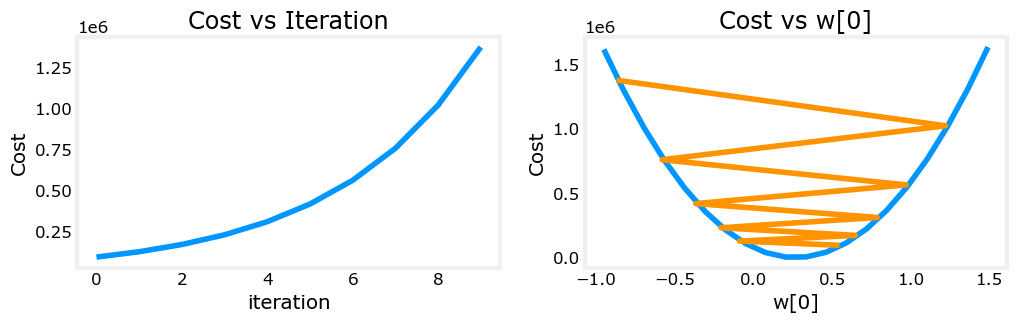

In [7]:
plot_cost_i_w(X_train,y_train,hist)

In [14]:
# alpha is 9e-7
_,_,hist=run_gradient_descent(X_train,y_train,10,alpha=9e-7)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 6.64616e+04  5.0e-01  9.1e-04  4.7e-04  1.1e-02  3.3e-04 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 6.18990e+04  1.8e-02  2.1e-05  2.0e-06 -7.9e-04  1.9e-05  5.3e+05  9.8e+02  5.2e+02  1.3e+04  3.4e+02
        2 5.76572e+04  4.8e-01  8.6e-04  4.4e-04  9.5e-03  3.2e-04 -5.1e+05 -9.3e+02 -4.8e+02 -1.1e+04 -3.4e+02
        3 5.37137e+04  3.4e-02  3.9e-05  2.8e-06 -1.6e-03  3.8e-05  4.9e+05  9.1e+02  4.8e+02  1.2e+04  3.2e+02
        4 5.00474e+04  4.6e-01  8.2e-04  4.1e-04  8.0e-03  3.2e-04 -4.8e+05 -8.7e+02 -4.5e+02 -1.1e+04 -3.1e+02
        5 4.66388e+04  5.0e-02  5.6e-05  2.5e-06 -2.4e-03  5.6e-05  4.6e+05  8.5e+02  4.5e+02  1.2e+04  2.9e+02
        6 4.34700e+04  4.5e-01  7.8e-04  3.8e-04  6.4e-03  3.2e-04 -4.4e+05 -8.1e+02 -4.2e+02 -9.8e+03 -

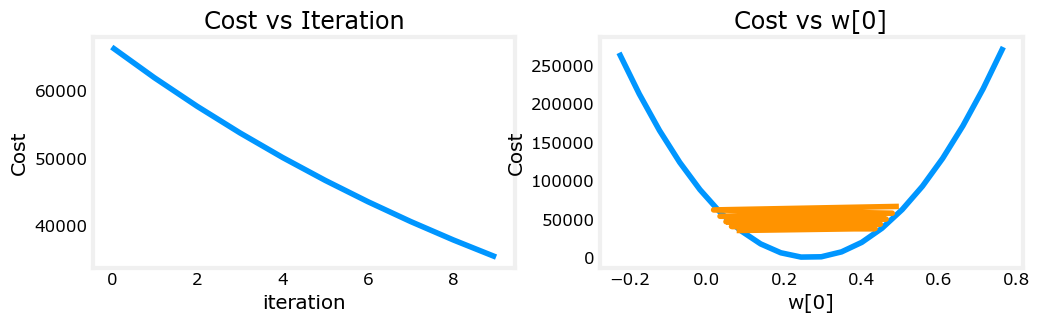

In [15]:
plot_cost_i_w(X_train,y_train,hist)

In [16]:
_,_,hist=run_gradient_descent(X_train,y_train,10,alpha=1e-7)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 4.42313e+04  5.5e-02  1.0e-04  5.2e-05  1.2e-03  3.6e-05 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 2.76461e+04  9.8e-02  1.8e-04  9.2e-05  2.2e-03  6.5e-05 -4.3e+05 -7.9e+02 -4.0e+02 -9.5e+03 -2.8e+02
        2 1.75102e+04  1.3e-01  2.4e-04  1.2e-04  2.9e-03  8.7e-05 -3.4e+05 -6.1e+02 -3.1e+02 -7.3e+03 -2.2e+02
        3 1.13157e+04  1.6e-01  2.9e-04  1.5e-04  3.5e-03  1.0e-04 -2.6e+05 -4.8e+02 -2.4e+02 -5.6e+03 -1.8e+02
        4 7.53002e+03  1.8e-01  3.3e-04  1.7e-04  3.9e-03  1.2e-04 -2.1e+05 -3.7e+02 -1.9e+02 -4.2e+03 -1.4e+02
        5 5.21639e+03  2.0e-01  3.5e-04  1.8e-04  4.2e-03  1.3e-04 -1.6e+05 -2.9e+02 -1.5e+02 -3.1e+03 -1.1e+02
        6 3.80242e+03  2.1e-01  3.8e-04  1.9e-04  4.5e-03  1.4e-04 -1.3e+05 -2.2e+02 -1.1e+02 -2.3e+03 -

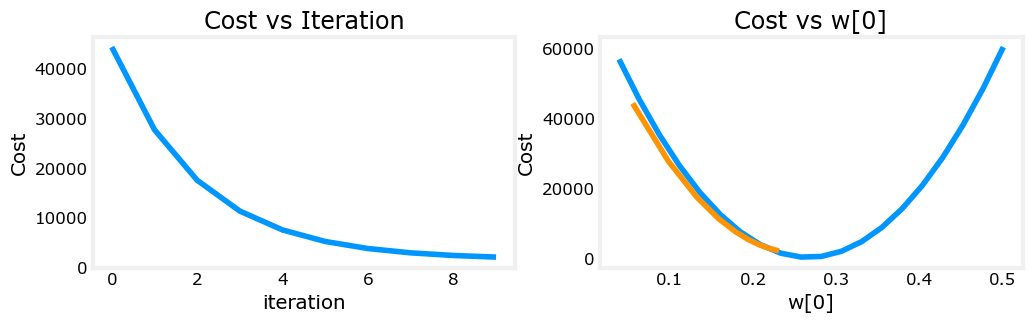

In [17]:
plot_cost_i_w(X_train,y_train,hist)

In [18]:
def zscore_normalize_function(X):
    """
    computes X, zscore normalize by column

    Args:
        X (ndarray(m,n)): input data, with m examples and n features

    Returns:
        X_norm(ndarray(m,n)): input normalized by column
        mu (ndarray(n,)): mean of each feature
        sigma (ndarray(n,)): standard deviation of each feature
    """

    mu=np.mean(X,axis=0)
    sigma=np.std(X,axis=0)
    X_norm=(X-mu)/sigma

    return(X_norm,mu,sigma)

In [19]:
from sklearn.preprocessing import scale
scale(X_train,axis=0,with_mean=True,with_std=True,copy=True)

array([[-4.24e-01,  4.34e-01, -7.89e-01,  9.94e-01],
       [ 1.28e+00,  4.34e-01,  1.27e+00, -8.30e-01],
       [ 7.45e-01,  4.34e-01,  1.27e+00,  1.40e-01],
       [ 1.31e+00,  4.34e-01,  1.27e+00, -9.07e-01],
       [-2.54e-01, -1.10e+00, -7.89e-01, -9.46e-01],
       [-1.35e+00, -1.10e+00, -7.89e-01,  1.07e+00],
       [ 1.01e+00,  4.34e-01, -7.89e-01, -8.30e-01],
       [-9.53e-01,  4.34e-01, -7.89e-01,  1.79e-01],
       [ 4.31e+00,  1.97e+00,  1.27e+00,  1.89e+00],
       [-1.53e+00, -1.10e+00, -7.89e-01,  1.61e+00],
       [-5.31e-01, -1.10e+00,  1.27e+00, -8.30e-01],
       [ 3.37e-01, -1.10e+00, -7.89e-01, -7.91e-01],
       [ 2.82e-02,  4.34e-01, -7.89e-01, -7.13e-01],
       [-4.82e-01, -1.10e+00, -7.89e-01, -9.07e-01],
       [-7.93e-01, -1.10e+00, -7.89e-01,  9.94e-01],
       [-1.39e+00, -2.63e+00, -7.89e-01, -8.30e-01],
       [ 6.40e-01,  4.34e-01,  1.27e+00, -5.97e-01],
       [ 8.49e-01,  4.34e-01,  1.27e+00, -7.91e-01],
       [-9.19e-01,  4.34e-01, -7.89e-01,  2.18

Text(0.5, 0, 'size(sqft)')

Text(0, 0.5, 'age')

Text(0.5, 1.0, 'unnormalized')

(667.7, 3314.3, 7.25, 111.75)

Text(0.5, 0, 'size(sqft)')

Text(0, 0.5, 'age')

Text(0.5, 1.0, 'X-$\\mu$')

(-750.6737373737374, 1895.9262626262625, -31.13383838383838, 73.36616161616162)

Text(0.5, 0, 'size(sqft)')

Text(0, 0.5, 'age')

Text(0.5, 1.0, 'Z-score normalized')

(-1.8237250595431904,
 4.606059948619359,
 -1.2077733915059707,
 2.8460897350493126)

Text(0.5, 0.98, 'distribution of feratures before, during, and after normalization')

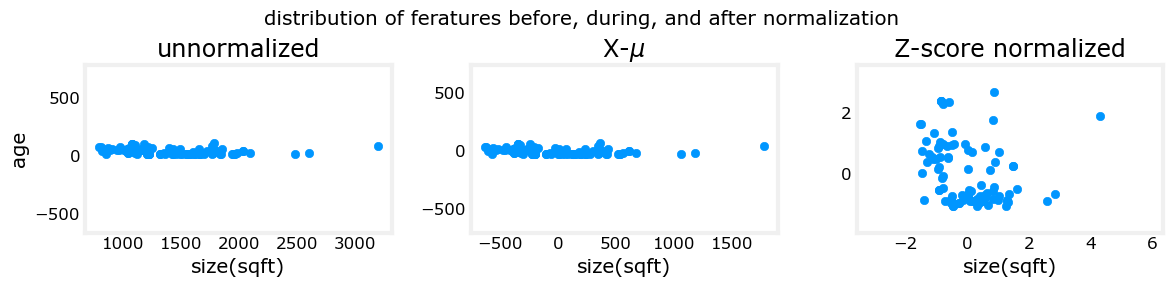

In [22]:
mu=np.mean(X_train,axis=0)
sigma=np.std(X_train,axis=0)
X_mean=(X_train-mu)
X_norm=(X_train-mu)/sigma

fig,ax=plt.subplots(1,3,figsize=(12,3))
ax[0].scatter(X_train[:,0],X_train[:,3])
ax[0].set_xlabel(X_features[0])
ax[0].set_ylabel(X_features[3])
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean[:,0],X_mean[:,3])
ax[1].set_xlabel(X_features[0])
ax[0].set_ylabel(X_features[3])
ax[1].set_title(r"X-$\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm[:,0],X_norm[:,3])
ax[2].set_xlabel(X_features[0])
ax[0].set_ylabel(X_features[3])
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')

plt.tight_layout(rect=[0,0.03,1,0.95])
plt.suptitle("distribution of feratures before, during, and after normalization")
plt.show()

In [24]:
X_norm,X_mu,X_sigma=zscore_normalize_function(X_train)
print(f"X_mu={X_mu}, \nX_sigma={X_sigma}")
print(f"Peak to Peak range by column in Raw X:{np.ptp(X_train,axis=0)}")
print(f"Peak tp Peak range by column in Normalized X: {np.ptp(X_norm,axis=0)}")

X_mu=[1.42e+03 2.72e+00 1.38e+00 3.84e+01], 
X_sigma=[411.62   0.65   0.49  25.78]
Peak to Peak range by column in Raw X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak tp Peak range by column in Normalized X: [5.85 6.14 2.06 3.69]


Text(0.5, 0, 'size(sqft)')

Text(0.5, 0, 'bredooms')

Text(0.5, 0, 'floors')

Text(0.5, 0, 'age')

Text(0, 0.5, 'count')

Text(0.5, 0.98, 'distribution of features before normalization')

Text(0.5, 0, 'size(sqft)')

Text(0.5, 0, 'bredooms')

Text(0.5, 0, 'floors')

Text(0.5, 0, 'age')

Text(0, 0.5, 'count')

Text(0.5, 0.98, 'distribution of features after normalization')

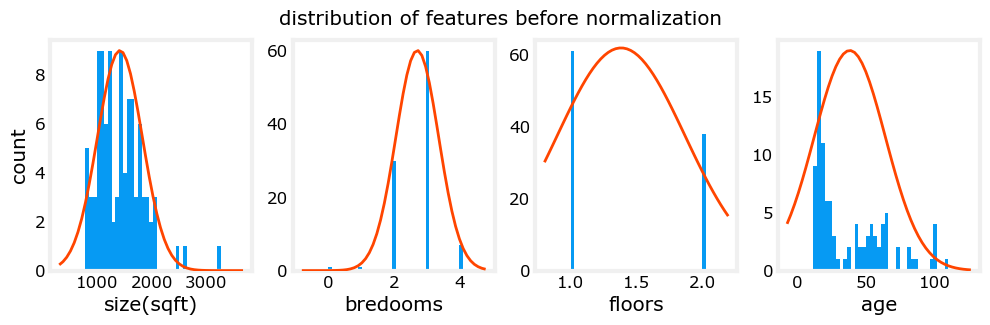

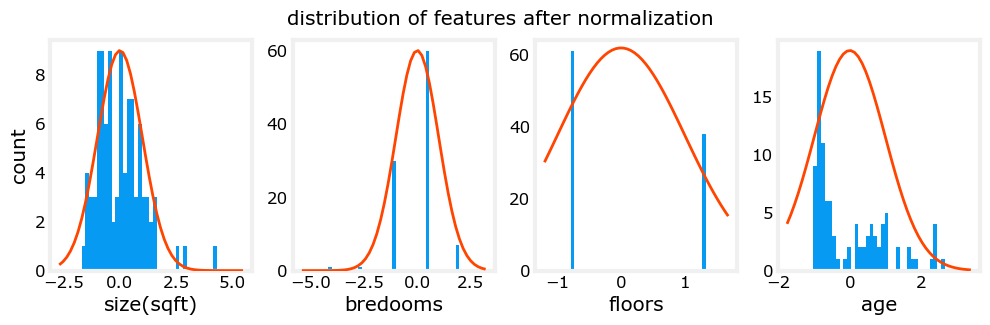

In [37]:
fig,ax=plt.subplots(1,4,figsize=(12,3))
for i in range(len(ax)):
    norm_plot(ax[i],X_train[:,i])
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count")
fig.suptitle("distribution of features before normalization")

fig,ax=plt.subplots(1,4,figsize=(12,3))
for i in range(len(ax)):
    norm_plot(ax[i],X_norm[:,i])
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count")
fig.suptitle("distribution of features after normalization")

In [45]:
X_norm

array([[-4.24e-01,  4.34e-01, -7.89e-01,  9.94e-01],
       [ 1.28e+00,  4.34e-01,  1.27e+00, -8.30e-01],
       [ 7.45e-01,  4.34e-01,  1.27e+00,  1.40e-01],
       [ 1.31e+00,  4.34e-01,  1.27e+00, -9.07e-01],
       [-2.54e-01, -1.10e+00, -7.89e-01, -9.46e-01],
       [-1.35e+00, -1.10e+00, -7.89e-01,  1.07e+00],
       [ 1.01e+00,  4.34e-01, -7.89e-01, -8.30e-01],
       [-9.53e-01,  4.34e-01, -7.89e-01,  1.79e-01],
       [ 4.31e+00,  1.97e+00,  1.27e+00,  1.89e+00],
       [-1.53e+00, -1.10e+00, -7.89e-01,  1.61e+00],
       [-5.31e-01, -1.10e+00,  1.27e+00, -8.30e-01],
       [ 3.37e-01, -1.10e+00, -7.89e-01, -7.91e-01],
       [ 2.82e-02,  4.34e-01, -7.89e-01, -7.13e-01],
       [-4.82e-01, -1.10e+00, -7.89e-01, -9.07e-01],
       [-7.93e-01, -1.10e+00, -7.89e-01,  9.94e-01],
       [-1.39e+00, -2.63e+00, -7.89e-01, -8.30e-01],
       [ 6.40e-01,  4.34e-01,  1.27e+00, -5.97e-01],
       [ 8.49e-01,  4.34e-01,  1.27e+00, -7.91e-01],
       [-9.19e-01,  4.34e-01, -7.89e-01,  2.18

In [46]:
w_norm,b_norm,hist=run_gradient_descent(X_norm,y_train,1000,1e-1)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 5.76170e+04  8.9e+00  3.0e+00  3.3e+00 -6.0e+00  3.6e+01 -8.9e+01 -3.0e+01 -3.3e+01  6.0e+01 -3.6e+02
      100 2.21086e+02  1.1e+02 -2.0e+01 -3.1e+01 -3.8e+01  3.6e+02 -9.2e-01  4.5e-01  5.3e-01 -1.7e-01 -9.6e-03
      200 2.19209e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.0e-02  1.5e-02  1.7e-02 -6.0e-03 -2.6e-07
      300 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -1.0e-03  5.1e-04  5.7e-04 -2.0e-04 -6.9e-12
      400 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.4e-05  1.7e-05  1.9e-05 -6.6e-06 -2.7e-13
      500 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -1.1e-06  5.6e-07  6.2e-07 -2.2e-07 -2.6e-13
      600 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.7e-08  1.9e-08  2.1e-08 -7.3e-09 -

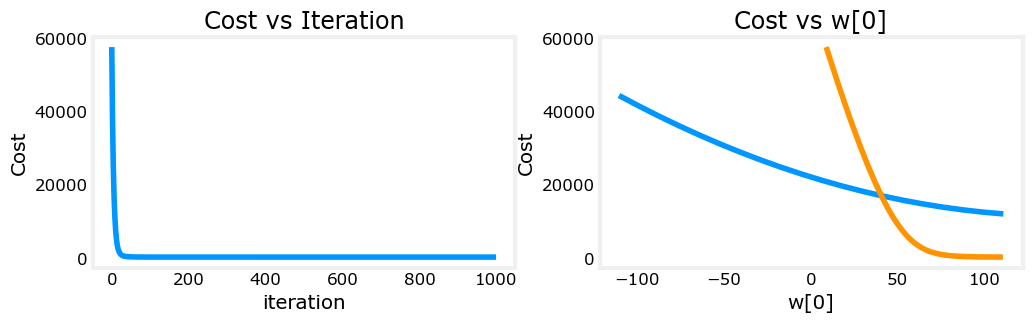

In [47]:
plot_cost_i_w(X_norm,y_train,hist)

In [49]:
m=X_norm.shape[0]
yp=np.zeros(m)
for i in range(m):
    yp[i]=np.dot(X_norm[i],w_norm)+b_norm
yp

array([295.18, 485.98, 389.52, 492.15, 420.25, 222.78, 523.42, 267.55,
       685.2 , 181.75, 317.95, 479.63, 409.95, 393.53, 286.97, 323.28,
       405.96, 436.43, 269.84, 500.72, 328.61, 388.16, 551.59, 241.48,
       295.46, 282.48, 217.11, 491.17, 228.84, 341.21, 291.36, 490.12,
       238.29, 598.53, 383.73, 452.82, 401.27, 405.94, 172.18, 423.58,
       434.41, 277.01, 228.84, 448.61, 489.06, 331.76, 465.8 , 221.67,
       386.72, 456.66, 370.49, 468.87, 310.19, 426.51, 391.78, 347.54,
       339.21, 471.59, 243.32, 297.94, 272.87, 249.66, 297.83, 334.93,
       375.9 , 288.86, 228.84, 621.12, 352.77, 511.13, 364.05, 363.09,
       297.83, 407.27, 288.55, 385.9 , 488.28, 260.88, 259.05, 427.65,
       238.04, 355.57, 339.63, 390.3 , 381.62, 220.04, 434.41, 243.33,
       465.8 , 185.78, 341.22, 410.26, 445.65, 231.87, 331.76, 409.23,
       405.94, 351.39, 274.21])

In [50]:
m

99

Text(0.5, 0, 'size(sqft)')

Text(0.5, 0, 'bredooms')

Text(0.5, 0, 'floors')

Text(0.5, 0, 'age')

Text(0, 0.5, 'Price')

Text(0.5, 0.98, 'target versus prediction using z-score normalized model')

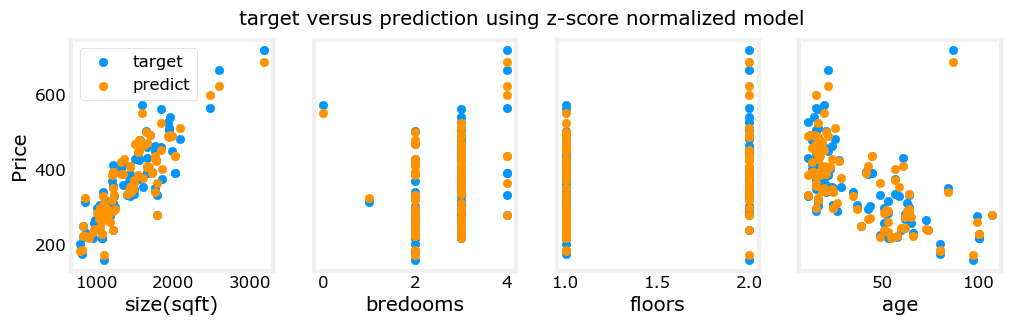

In [51]:
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train,label='target')
    ax[i].scatter(X_train[:,i],yp,color=dlc['dlorange'],label='predict')
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price")
ax[0].legend()
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

In [56]:
x_house=np.array([1200,3,1,40])
x_house_norm=(x_house-X_mu)/X_sigma
print(x_house_norm)
x_house_predict=np.dot(x_house_norm,w_norm)+b_norm
print(f"predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 year old=${x_house_predict*1000:0.0f}")

[-0.53  0.43 -0.79  0.06]
predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 year old=$318709


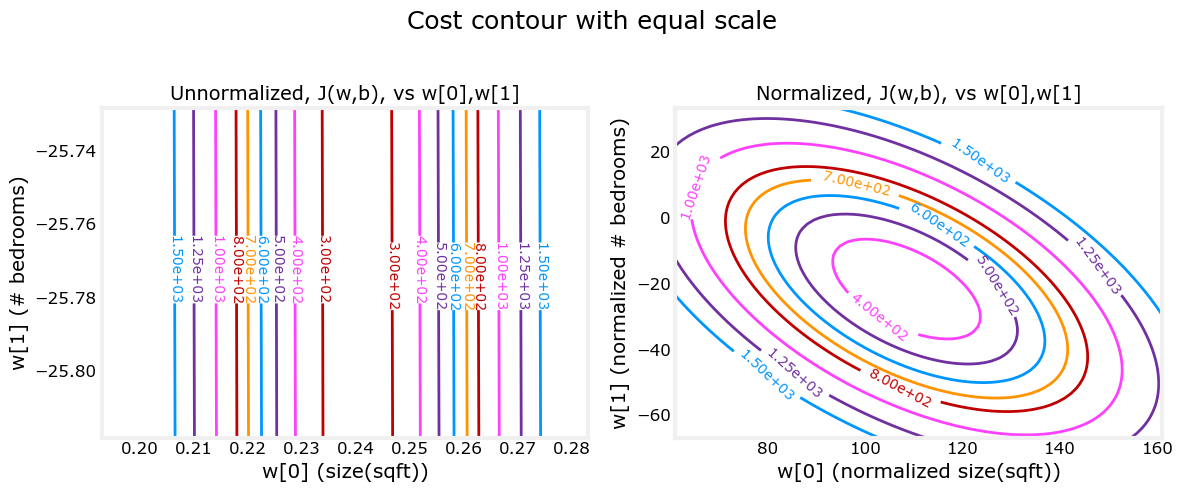

In [57]:
plt_equal_scale(X_train,X_norm,y_train)